#  **Bike Demand Prediction with LSTMs using TensorFlow and Keras **


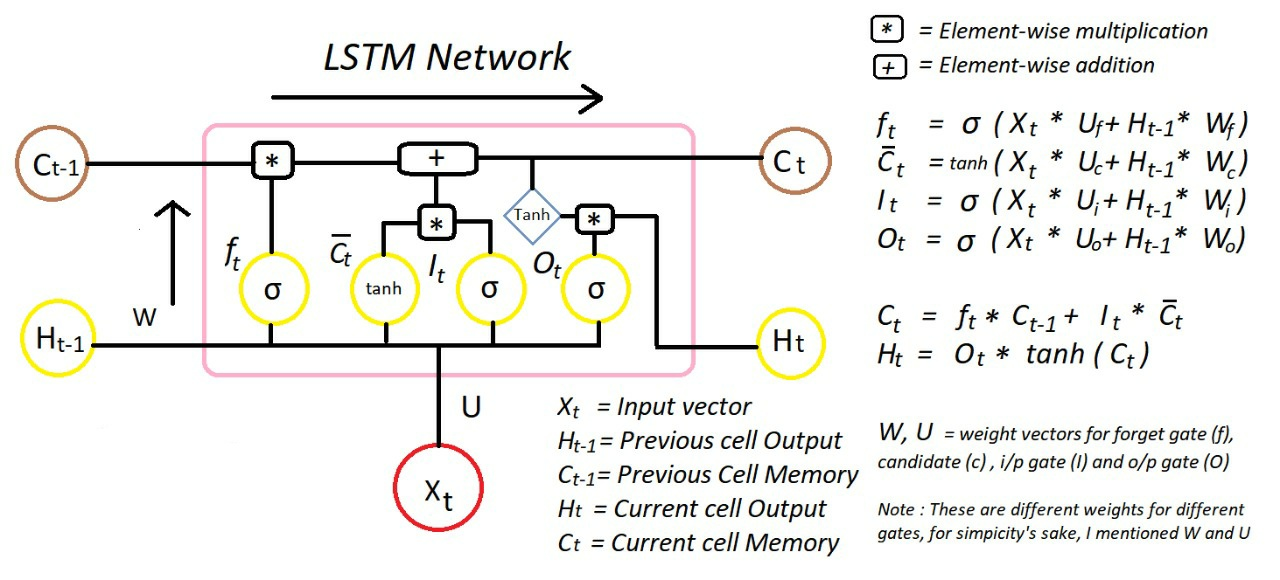

# **Bidirectional LSTM :** 
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

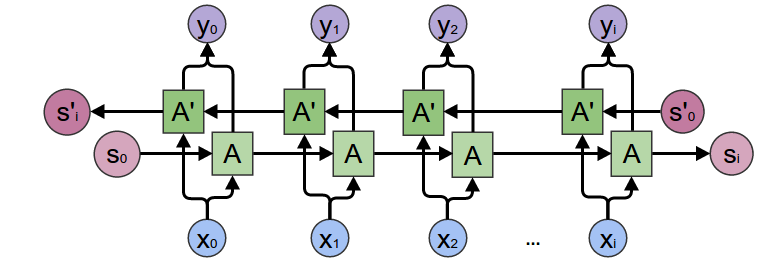


# **Goal:**
* ***Our goal is to predict the number of future bike shares given the historical data of London bike shares.***

# **Here are the steps:**
* <a href='#Data'>Data</a>
* <a href='#Feature Engineering'>Feature Engineering</a>
* <a href='#Exploratory Data Analysis'>Exploratory Data Analysis</a>
* <a href='#Preprocessing'>Preprocessing</a>
* <a href='#Model Building'>Model Building</a>
* <a href='#Demand Predictions'>Demand Predictions</a>
* <a href='#Evaluation'>Evaluation</a>

<a id='Data'></a>
# **Data**

Metadata:
* "timestamp" - timestamp field for grouping the data
* "cnt" - the count of a new bike shares
* "t1" - real temperature in C
* "t2" - temperature in C "feels like"
* "hum" - humidity in percentage
* "windspeed" - wind speed in km/h
* "weathercode" - category of the weather
* "isholiday" - boolean field - 1 holiday / 0 non holiday
* "isweekend" - boolean field - 1 if the day is weekend
* "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter
* "weathe_code" category description:
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
data = pd.read_csv("../input/london-bike-sharing-dataset/london_merged.csv")

In [ ]:
data.head()

# **GPU**

In [ ]:
import tensorflow.compat.v1 as tf
print(tf.test.gpu_device_name())
# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

<a id='Feature Engineering'></a>
# **Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np

data.shape
data.info(memory_usage="deep")

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1, color_codes=True)

data.columns
data.head()

data["timestamp"] = pd.to_datetime(data["timestamp"])

data = data.set_index("timestamp")

data["hour"] = data.index.hour
data["day_of_month"] = data.index.day
data["day_of_week"]  = data.index.dayofweek
data["month"] = data.index.month

data.columns
data.shape

corr_matrix = data.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [ ]:
print(high_corr_var)

In [ ]:
data.head()

<a id='Exploratory Data Analysis'></a>
# **Exploratory Data Analysis**

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),cmap="YlGnBu",square=True,linewidths=.5,center=0,linecolor="red")

From the above heatmap we can say that **t1** and **t2** are Highly Correlated with each other.

In [ ]:
plt.figure(figsize=(16,6))
data.isnull().sum()
sns.heatmap(data.isnull(),cmap="viridis")

**This clean heatmap says that data does not have even a single Null value.**

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data,x=data.index,y=data.cnt)
plt.xticks(rotation=90)

In [ ]:
df_by_month = data.resample("M").sum()

plt.figure(figsize=(16,6))
sns.lineplot(data=df_by_month,x=df_by_month.index,y=df_by_month.cnt,color="red")
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.hour,y=data.cnt,color="black")

**Here we can say that between morning 8 to 9 the Demand is on peak.**

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.month,y=data.cnt,color="red")

**By looking at the above graph we can say that in the July month the demand is on peak and then start to decrease.**

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.day_of_week,y=data.cnt,color="black")

**Least demand comes from weekend.**

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=data,x=data.day_of_month,y=data.cnt,color="r")

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.hour,y=data.cnt,hue=data.is_holiday)

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.month,y=data.cnt,hue=data.is_holiday)

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,hue=data.season,y=data.cnt,x=data.month)

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=data,hue=data.is_holiday,x=data.season)

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.hum,y=data.cnt,color="black")
plt.xticks(rotation=90)

**Demand decreases with Increasing humidity.** 

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.wind_speed,y=data.cnt)
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.weather_code,y=data.cnt)
plt.xticks(rotation=90)

**Maximul demands comes in scattered coluds weather.**

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(x=data.hour,y=data.cnt,data=data,hue=data.is_weekend)

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(x=data.hour,y=data.cnt,data=data,hue=data.season)

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(x=data.hour,y=data.cnt,data=data,hue=data.weather_code)

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=data,x=data.day_of_week,hue=data.weather_code,palette="viridis")
plt.legend(loc="best")

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data,x=data["hour"],y=data.cnt)

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data,x=data["day_of_week"],y=data.cnt)

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data,x=data["day_of_month"],y=data.cnt)

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data,x=data["month"],y=data.cnt)

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data,x=data["day_of_month"],y=data.cnt,hue=data["is_holiday"])

<a id='Preprocessing'></a>
# **Preprocessing**

* Training set = 90% of tha data
* Testing set  = 10% of the data

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.1,random_state=0)

print(train.shape)
print(test.shape)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()

num_colu = ['t1', 't2', 'hum', 'wind_speed']
trans_1 = scaler.fit(train[num_colu].to_numpy())
train.loc[:,num_colu] = trans_1.transform(train[num_colu].to_numpy())
test.loc[:,num_colu] = trans_1.transform(test[num_colu].to_numpy())

cnt_scaler = MinMaxScaler()
trans_2 = cnt_scaler.fit(train[["cnt"]])
train["cnt"] = trans_2.transform(train[["cnt"]])
test["cnt"] = trans_2.transform(test[["cnt"]])

In [ ]:
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
def prepare_data(X,y,time_steps=1):
    Xs = []
    Ys = []
    for i in tqdm(range(len(X) - time_steps)):
        a = X.iloc[i:(i + time_steps)].to_numpy()
        Xs.append(a)
        Ys.append(y.iloc[i+time_steps])
    return np.array(Xs),np.array(Ys)    

steps=24
X_train , y_train = prepare_data(train,train.cnt,time_steps=steps)
X_test , y_test = prepare_data(test,test.cnt,time_steps=steps)
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test: {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

<a id='Model Building'></a>
# **Model Building**

In [ ]:
### LSTMM model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM , Bidirectional 


model = Sequential()
model.add(Bidirectional(LSTM(128,input_shape=(X_train.shape[1],X_train.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="mse")

with tf.device('/GPU:0'):
    prepared_model = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=[X_test,y_test])

plt.plot(prepared_model.history["loss"],label="loss")
plt.plot(prepared_model.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")

<a id='Demand Predictions'></a>
# **Demand Predictions**

In [ ]:
pred = model.predict(X_test)

y_test_inv = cnt_scaler.inverse_transform(y_test.reshape(-1,1))
pred_inv = cnt_scaler.inverse_transform(pred)

plt.figure(figsize=(16,6))
plt.plot(y_test_inv.flatten(),marker=".",label="actual")
plt.plot(pred_inv.flatten(),marker=".",label="prediction",color="r")

**Note that our model is predicting only one point in the future. That being said, it is doing very well. Although our model can’t really capture the extreme values it does a good job of predicting (understanding) the general pattern.**

In [ ]:
y_test_actual = cnt_scaler.inverse_transform(y_test.reshape(-1,1))
y_test_pred = cnt_scaler.inverse_transform(pred)

arr_1 = np.array(y_test_actual)
arr_2 = np.array(y_test_pred)

actual = pd.DataFrame(data=arr_1.flatten(),columns=["actual"])
predicted = pd.DataFrame(data=arr_2.flatten(),columns = ["predicted"])

In [ ]:
final = pd.concat([actual,predicted],axis=1)
final.head()

<a id='Evaluation'></a>
# **Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(final.actual,final.predicted)) 
r2 = r2_score(final.actual,final.predicted) 
print("rmse is : {}\nr2 is : {}".format(rmse,r2))

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(final.actual,label="Actual data")
plt.plot(final.predicted,label="predicted values")
plt.legend(loc="best")

# Conclusion : 
**AS you can see that I have used Bidirectional LSTM to train our model and Our model is working quite well.Our model is capable to capture the trend and not capturing the Extreme values which is a really good thing. SO, we can say that the overall perfomance is good.**

# If you like this notebook Please Do give an Upvote.


[](http://)